# Task 1 - Distribution of genes among the different clusters - 7_star-like
This notebook analyses the distribution of individual genes among the different clusters.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
from os import listdir
from os.path import isfile, join
import logging

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load adata

In [3]:
adata = sc.read_h5ad('../data/adata/rev_processed_adata7.h5ad')
adata.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCAAGGTGATAT-1-1  7_star-like         1  mouse               8302   
AAACCCACACGCTGAC-1-1  7_star-like         1  mouse               6537   
AAACCCAGTAATTGGA-1-1  7_star-like         1  mouse               8749   
AAACCCAGTTGTGCCG-1-1  7_star-like         1  mouse               6167   
AAACCCATCGGTTGTA-1-1  7_star-like         1  mouse               8476   
...                           ...       ...    ...                ...   
TTTGTTGCAGCACAGA-1-1  7_star-like         1  mouse               7535   
TTTGTTGGTACATTGC-1-1  7_star-like         1  mouse               3629   
TTTGTTGGTAGTATAG-1-1  7_star-like         1  mouse               7480   
TTTGTTGGTTGTGGCC-1-1  7_star-like         1  mouse               7885   
TTTGTTGTCGCTCTAC-1-1  7_star-like         1  mouse               7729   

                      log1p_n_genes_by_counts  total_counts  \
AAACCCAAGGTGATAT-1-1                 9.024372       72814.0   
AAACCCACACGCTGAC-1-1                 8.785387       49469.0   
AAACCCAGTAATTGGA-1-1                 9.076809      103751.0   
AAACCCAGTTGTGCCG-1-1                 8.727130       59204.0   
AAACCCATCGGTTGTA-1-1                 9.045112       80363.0   
...                                       ...           ...   
TTTGTTGCAGCACAGA-1-1                 8.927447       64538.0   
TTTGTTGGTACATTGC-1-1                 8.196988        8385.0   
TTTGTTGGTAGTATAG-1-1                 8.920122       55482.0   
TTTGTTGGTTGTGGCC-1-1                 8.972844       63675.0   
TTTGTTGTCGCTCTAC-1-1                 8.952864       62619.0   

                      log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCAAGGTGATAT-1-1           11.195677                   17.223336   
AAACCCACACGCTGAC-1-1           10.809122                   28.187350   
AAACCCAGTAATTGGA-1-1           11.549759                   23.059055   
AAACCCAGTTGTGCCG-1-1           10.988761                   26.317479   
AAACCCATCGGTTGTA-1-1           11.294322                   20.417356   
...                                  ...                         ...   
TTTGTTGCAGCACAGA-1-1           11.075025                   21.889429   
TTTGTTGGTACATTGC-1-1            9.034319                   12.784735   
TTTGTTGGTAGTATAG-1-1           10.923832                   21.452002   
TTTGTTGGTTGTGGCC-1-1           11.061563                   17.502945   
TTTGTTGTCGCTCTAC-1-1           11.044840                   17.937048   

                      pct_counts_in_top_100_genes  \
AAACCCAAGGTGATAT-1-1                    25.077595   
AAACCCACACGCTGAC-1-1                    40.975156   
AAACCCAGTAATTGGA-1-1                    33.003055   
AAACCCAGTTGTGCCG-1-1                    39.262550   
AAACCCATCGGTTGTA-1-1                    29.073081   
...                                           ...   
TTTGTTGCAGCACAGA-1-1                    31.998203   
TTTGTTGGTACATTGC-1-1                    18.366130   
TTTGTTGGTAGTATAG-1-1                    32.394290   
TTTGTTGGTTGTGGCC-1-1                    25.980369   
TTTGTTGTCGCTCTAC-1-1                    25.305418   

                      pct_counts_in_top_200_genes  \
AAACCCAAGGTGATAT-1-1                    34.316203   
AAACCCACACGCTGAC-1-1                    52.313570   
AAACCCAGTAATTGGA-1-1                    43.134042   
AAACCCAGTTGTGCCG-1-1                    51.560705   
AAACCCATCGGTTGTA-1-1                    38.430621   
...                                           ...   
TTTGTTGCAGCACAGA-1-1                    41.972171   
TTTGTTGGTACATTGC-1-1                    26.440072   
TTTGTTGGTAGTATAG-1-1                    42.502073   
TTTGTTGGTTGTGGCC-1-1                    35.586965   
TTTGTTGTCGCTCTAC-1-1                    34.593334   

                      pct_counts_in_top_500_genes  total_counts_mt  \
AAACCCAAGGTGATAT-1-1                    47.872662              0.0   
AAACCCACACGCTGAC-1-1                    64.452485              0.0   
AAACCCAGTAATTGGA-1-1                    5

In [4]:
adata.var

feature_types     mt gene_symbols-0-0-0-0-0-0  \
ENSMUSG00000051285  Gene Expression  False                   Pcmtd1   
ENSMUSG00000039748  Gene Expression  False                     Exo1   
ENSMUSG00000057363  Gene Expression  False                     Uxs1   
ENSMUSG00000038702  Gene Expression  False                     Dsel   
ENSMUSG00000033021  Gene Expression  False                    Gmppa   
...                             ...    ...                      ...   
ENSMUSG00000064367  Gene Expression  False                   mt-Nd5   
ENSMUSG00000064368  Gene Expression  False                   mt-Nd6   
ENSMUSG00000064370  Gene Expression  False                  mt-Cytb   
ENSMUSG00000095041  Gene Expression  False       ENSMUSG00000095041   
ENSMUSG00000095742  Gene Expression  False       ENSMUSG00000095742   

                    n_cells_by_counts-0-0-0-0-0-0  mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                           4892                 2.636992   
ENSMUSG00000039748                            106                 0.029674   
ENSMUSG00000057363                           3639                 1.102132   
ENSMUSG00000038702                           1867                 0.416307   
ENSMUSG00000033021                           2448                 0.506338   
...                                           ...                      ...   
ENSMUSG00000064367                           6188                44.415154   
ENSMUSG00000064368                           5237                 4.979113   
ENSMUSG00000064370                           6703               183.073898   
ENSMUSG00000095041                           5425                 7.305099   
ENSMUSG00000095742                            638                 0.099395   

                    log1p_mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                       1.291157   
ENSMUSG00000039748                       0.029243   
ENSMUSG00000057363                       0.742952   
ENSMUSG00000038702                       0.348052   
ENSMUSG00000033021                       0.409682   
...                                           ...   
ENSMUSG00000064367                       3.815846   
ENSMUSG00000064368                       1.788272   
ENSMUSG00000064370                       5.215337   
ENSMUSG00000095041                       2.116870   
ENSMUSG00000095742                       0.094760   

                    pct_dropout_by_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                          29.530395   
ENSMUSG00000039748                          98.473063   
ENSMUSG00000057363                          47.579948   
ENSMUSG00000038702                          73.105733   
ENSMUSG00000033021                          64.736387   
...                                               ...   
ENSMUSG00000064367                          10.861423   
ENSMUSG00000064368                          24.560645   
ENSMUSG00000064370                           3.442812   
ENSMUSG00000095041                          21.852492   
ENSMUSG00000095742                          90.809565   

                    total_counts-0-0-0-0-0-0  log1p_total_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                   18306.0                        9.815039   
ENSMUSG00000039748                     206.0                        5.332719   
ENSMUSG00000057363                    7651.0                        8.942722   
ENSMUSG00000038702                    2890.0                        7.969358   
ENSMUSG00000033021                    3515.0                        8.165079   
...                                      ...                             ...   
ENSMUSG00000064367                  308330.0                       12.638929   
ENSMUSG00000064368                   34565.0                       10.450625   
ENSMUSG00000064370                 1270899.0                       14.055236   
ENSMUSG00000095041                   50712.0                       10.833938   
ENSMUSG00000095742            

<a id="Clustering"></a>

## Clustering

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_r0.3', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


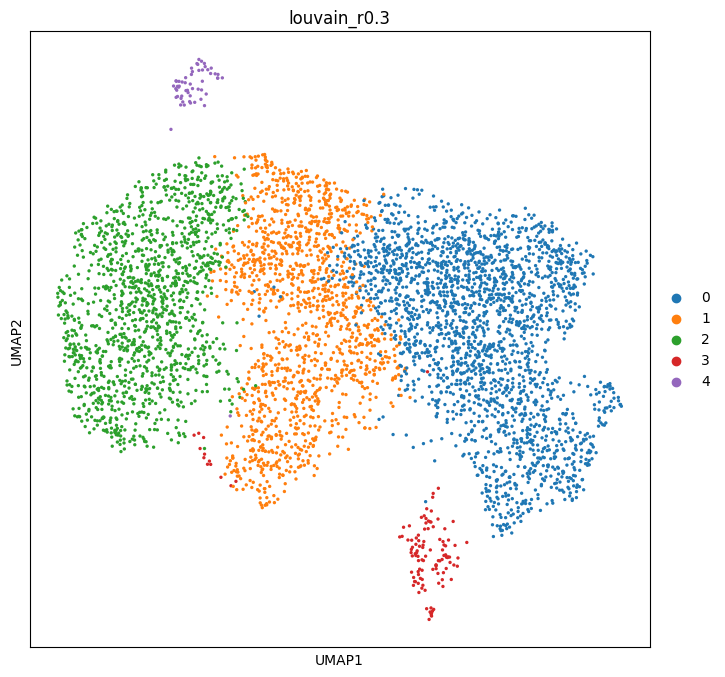

In [5]:
sc.tl.louvain(adata, resolution=0.3, key_added='louvain_r0.3', random_state=10)
adata.obs['louvain_r0.3'].value_counts()
sc.pl.umap(adata, color=['louvain_r0.3'])


In [ ]:
# merge 1+4 (for louvain merged_louvain, this is 2+4 for louvain r0.3)

In [6]:
import pandas as pd

def merge_clusters(adata):
    # Create a mapping for the clusters to be merged
    merge_map = {
        '0': '0',
        '1': '1',
        '2': '2',
        '3': '3',
        '4': '2',
    }
    
    # Use the pandas `map` function to remap the clusters
    adata.obs['merged_louvain'] = adata.obs['louvain_r0.3'].map(merge_map).astype('category')
    
    # Update the categories for the new cluster labels
    adata.obs['merged_louvain'] = adata.obs['merged_louvain'].cat.set_categories(['0', '1', '2', '3'])

# Assuming `adata` is your AnnData object
merge_clusters(adata)

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


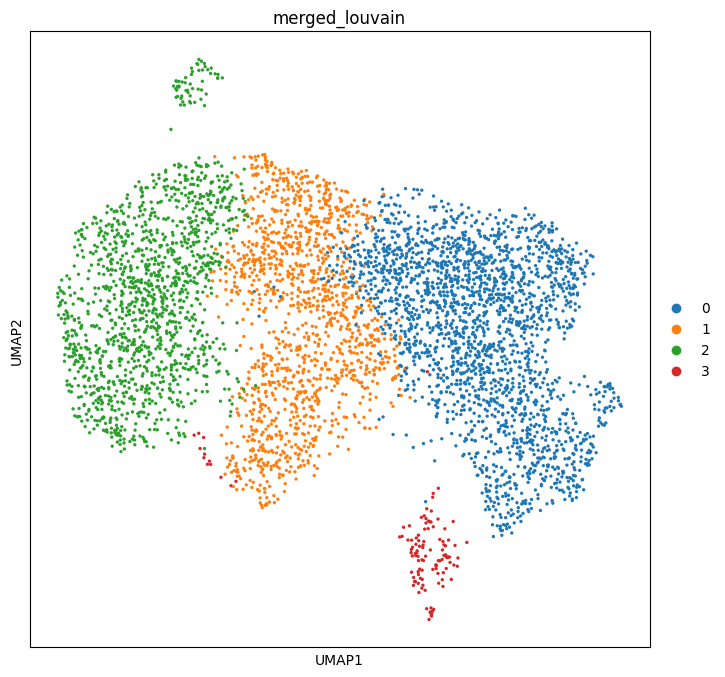

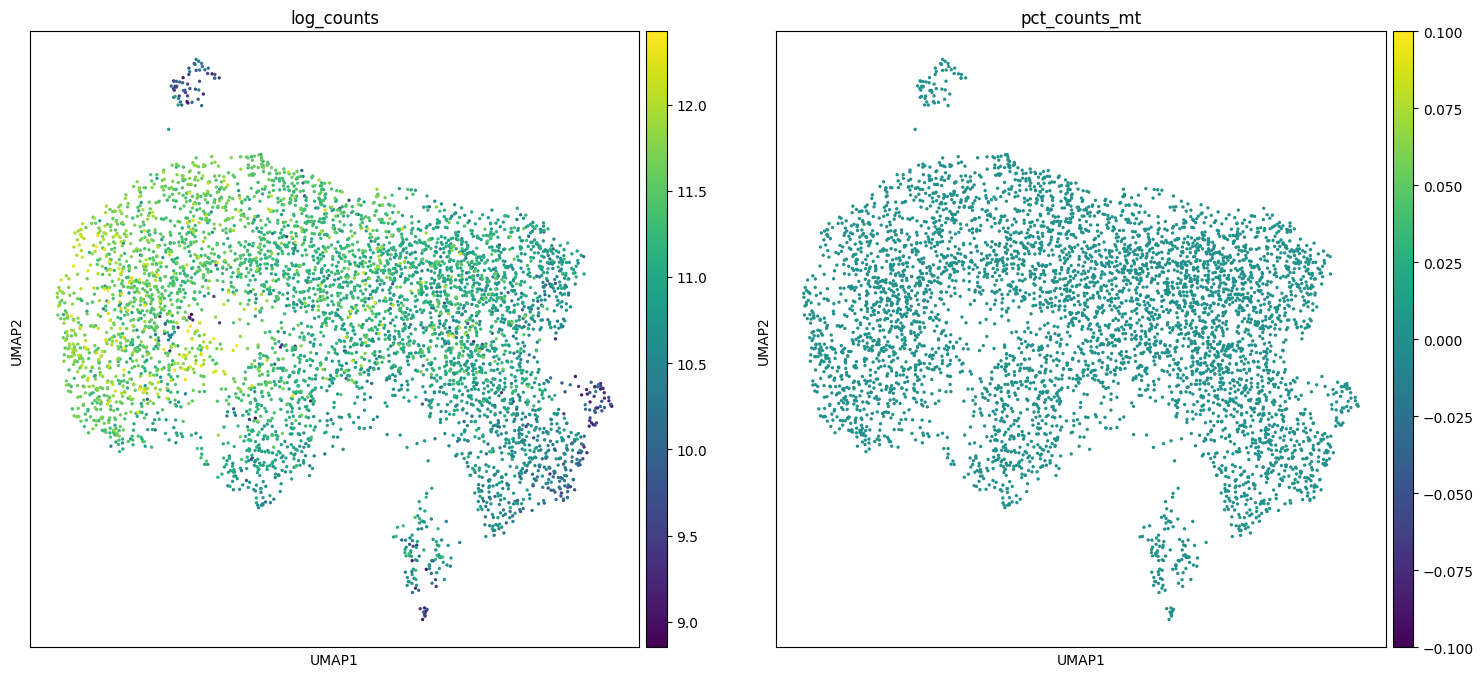

In [7]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['merged_louvain'])

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


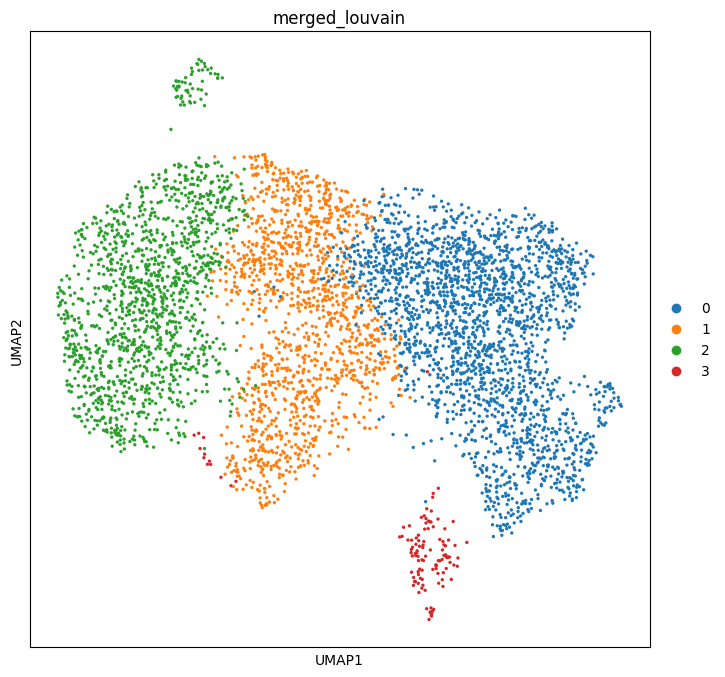

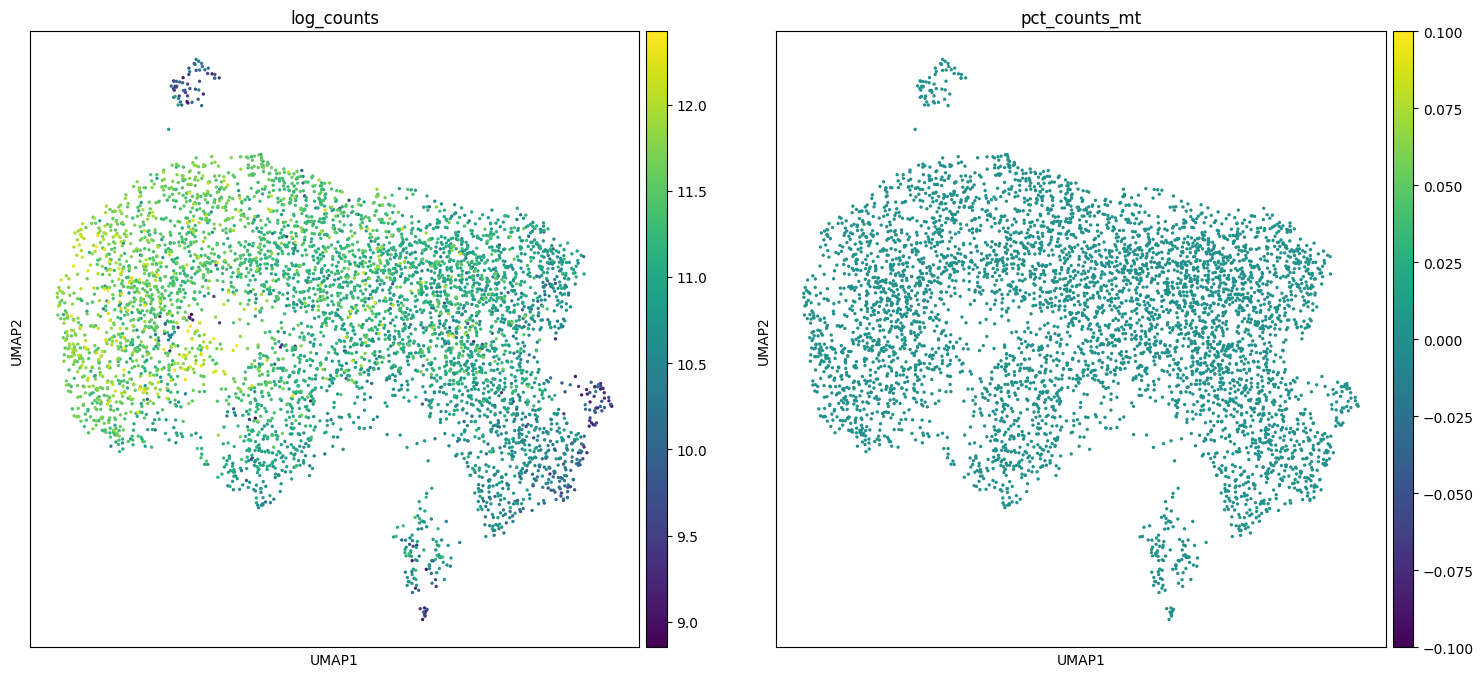

In [8]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['merged_louvain'], save='umap_7_star-like.pdf')
# os.rename("figures/umap7_star-like.pdf", 
#           "../rev_results/task1/7_star-like/UMAP.pdf")

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'], save='umap_counts_7_star-like.pdf')
# os.rename("figures/umap/7_star-like/UMAP_counts.pdf", 
#           "../rev_results/task1/7_star-like/UMAP_counts.pdf")

<a id="Markers"></a>

## Marker genes & cluster annotation

In [9]:
# Create a new AnnData object with gene symbols as var indices
adata_tmp = sc.AnnData(
    X=adata.X,  # Assuming you want to keep the same expression data
    obs=adata.obs.copy(),  # Copy the obs information from the original AnnData
)

# Set the gene symbols as var indices
adata_tmp.var.index = adata.var['gene_symbols-0-0-0-0-0-0']

In [10]:
# Perform gene ranking on the modified AnnData object
sc.tl.rank_genes_groups(adata_tmp, groupby='merged_louvain', key_added='rank_genes_merged_louvain')



ranking genes
    finished: added to `.uns['rank_genes_merged_louvain']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


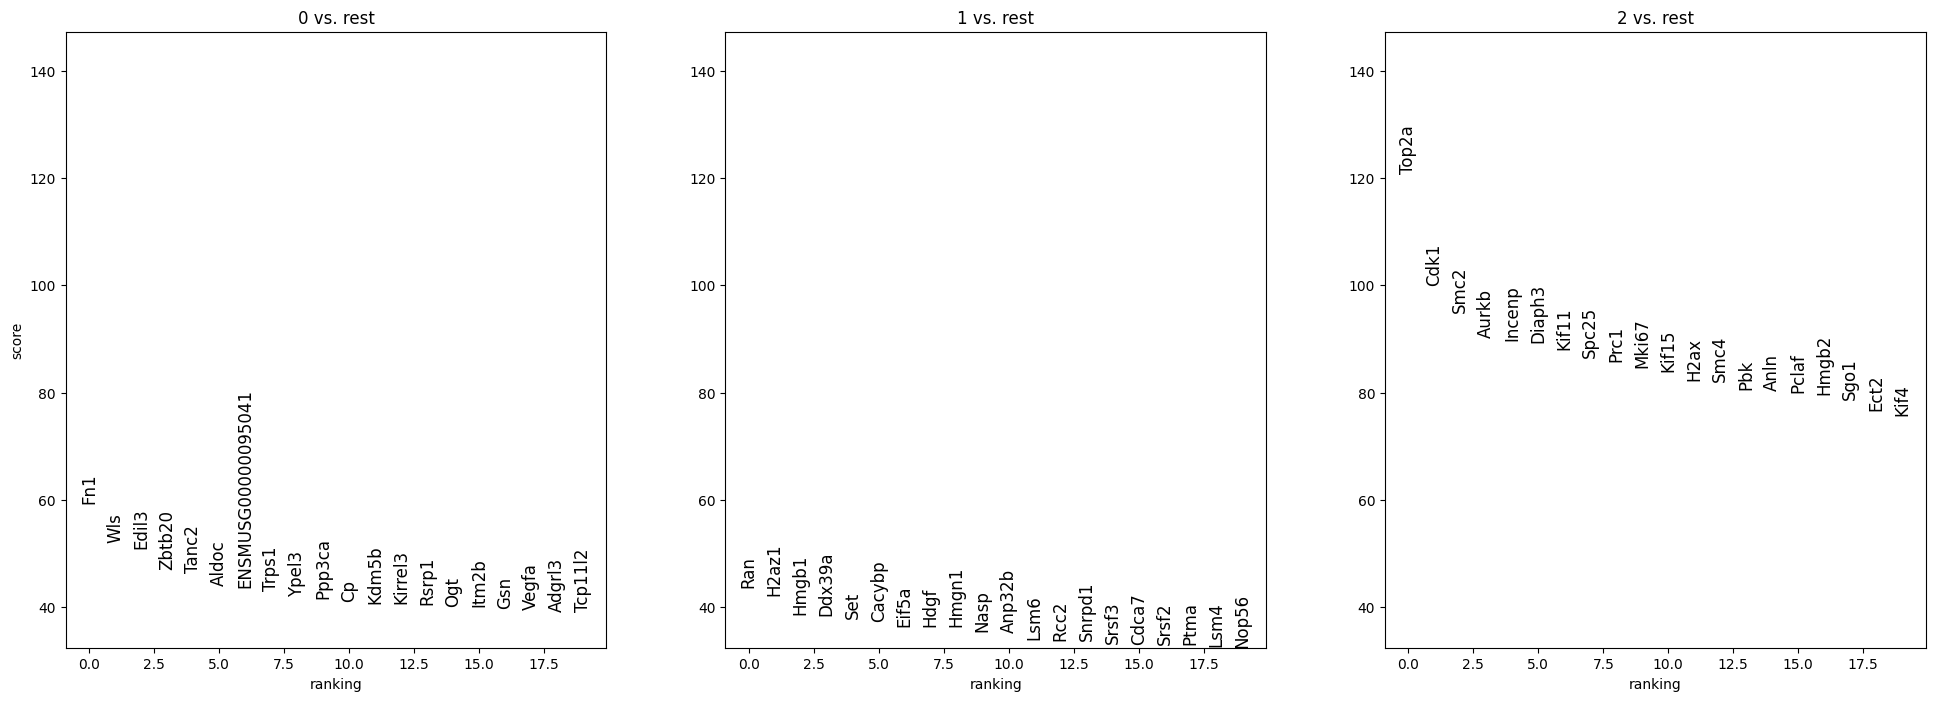

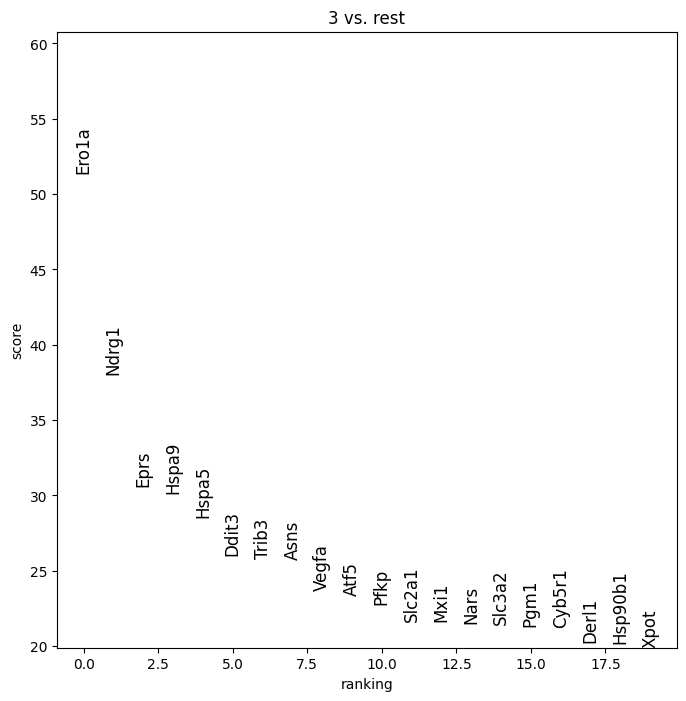

In [11]:
# Visualize the results using gene symbols
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_merged_louvain', groups=['0', '1', '2'], fontsize=12)
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_merged_louvain', groups=['3'], fontsize=12)

In [12]:
# Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Below we plot genes of particular interest within the clusters

### Cluster 0

Encrypted symbol for  Fn1 is  ENSMUSG00000026193


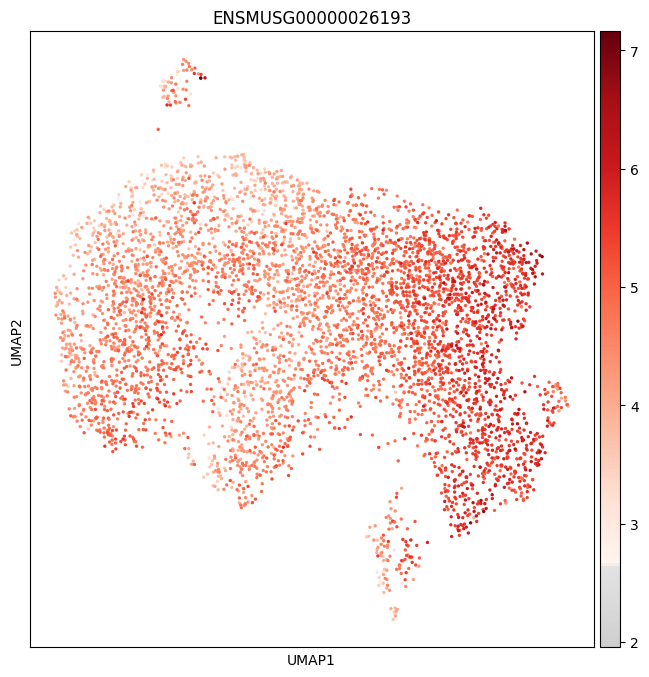

Encrypted symbol for  Wls is  ENSMUSG00000028173


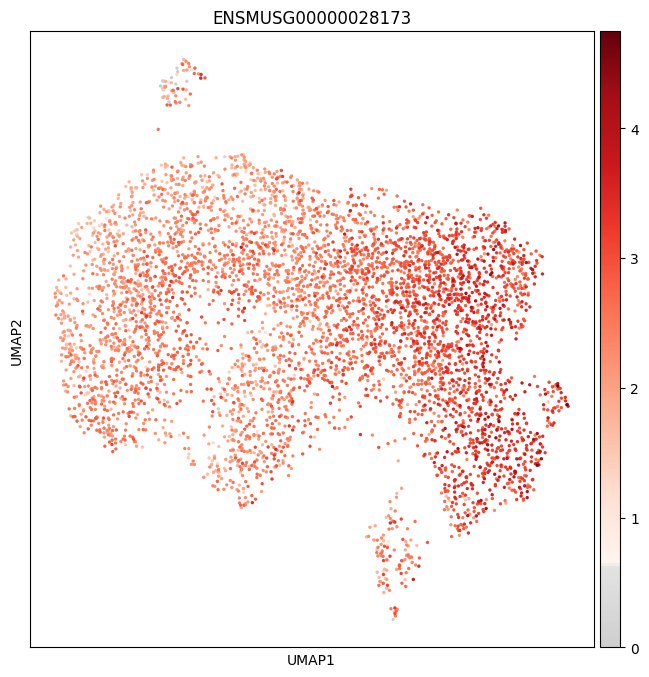

Encrypted symbol for  Edil3 is  ENSMUSG00000034488


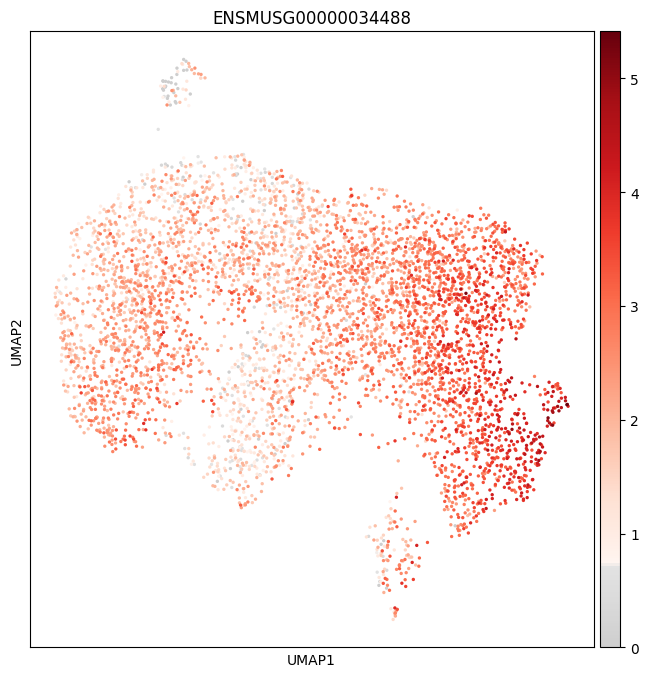

Encrypted symbol for  Zbtb20 is  ENSMUSG00000022708


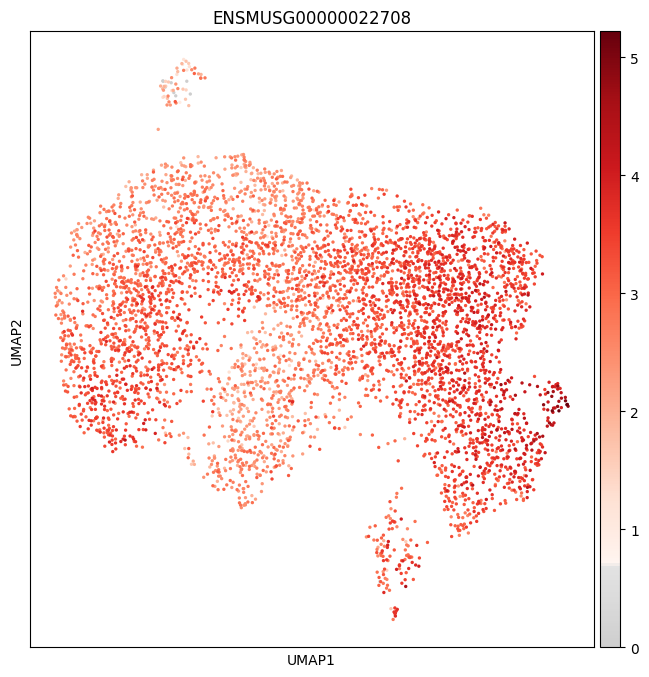

Encrypted symbol for  Tanc2 is  ENSMUSG00000053580


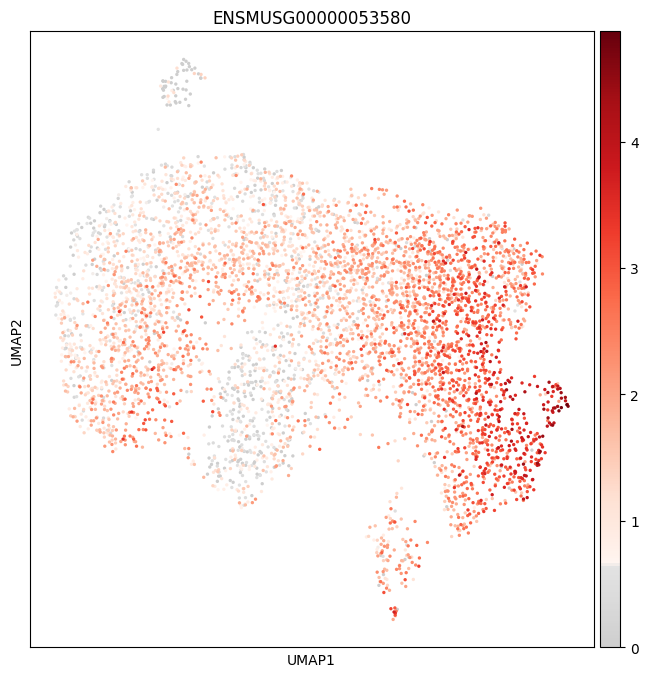

In [13]:
gene_symbols = ['Fn1', 'Wls', 'Edil3', 'Zbtb20', 'Tanc2']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/7_star-like_Cluster0_' + gene_symbol + '.pdf')


## Cluster 1

Encrypted symbol for  Ran is  ENSMUSG00000029430


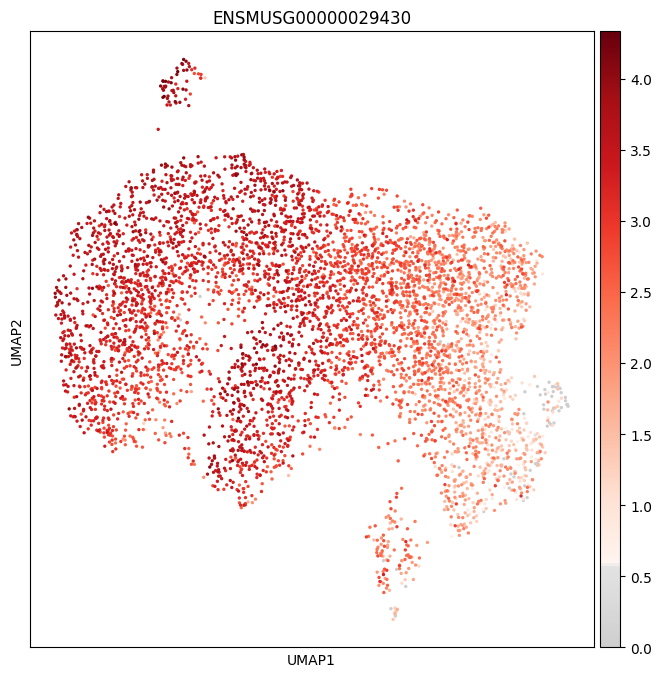

Encrypted symbol for  H2az1 is  ENSMUSG00000037894


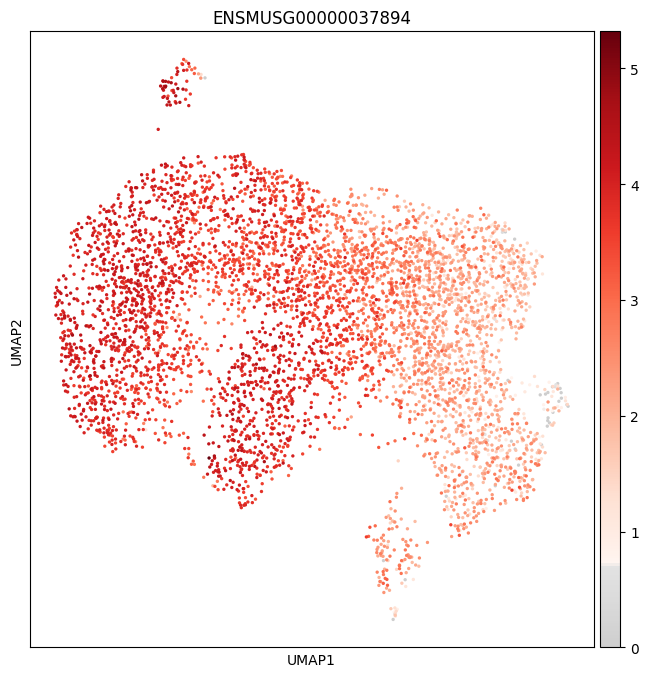

Encrypted symbol for  Hmgb1 is  ENSMUSG00000066551


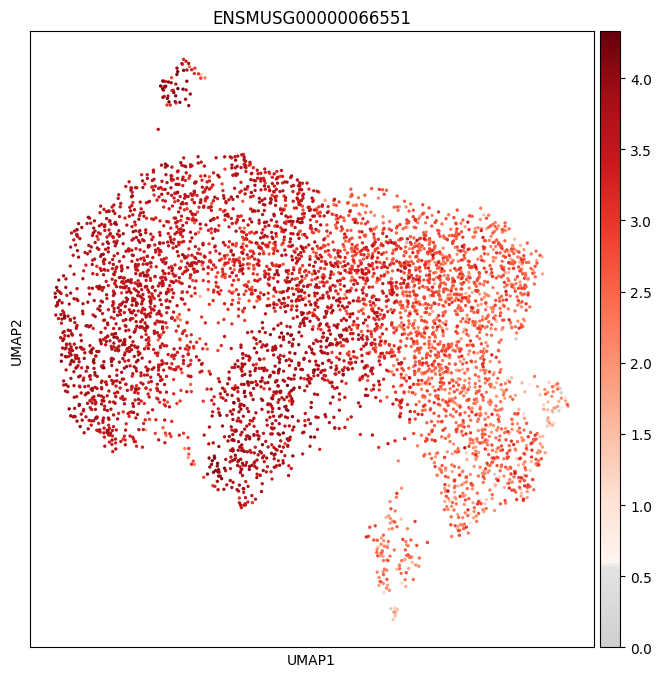

In [14]:
gene_symbols = ['Ran', 'H2az1', 'Hmgb1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/7_star-like_Cluster1_' + gene_symbol + '.pdf')


## Cluster 2

Encrypted symbol for  Top2a is  ENSMUSG00000020914


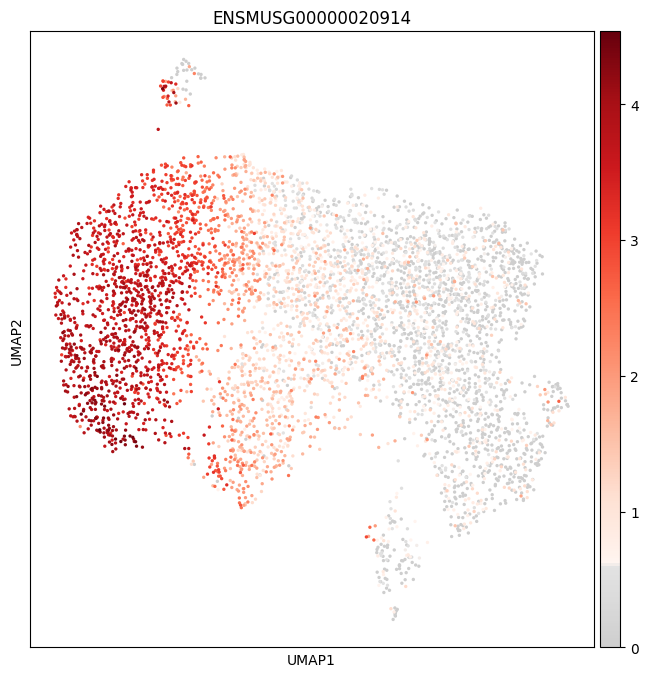

Encrypted symbol for  Cdk1 is  ENSMUSG00000019942


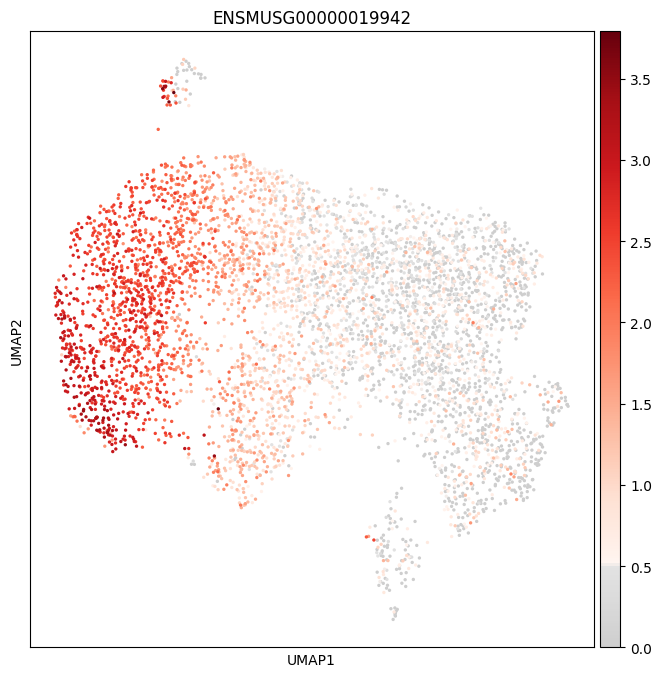

Encrypted symbol for  Smc2 is  ENSMUSG00000028312


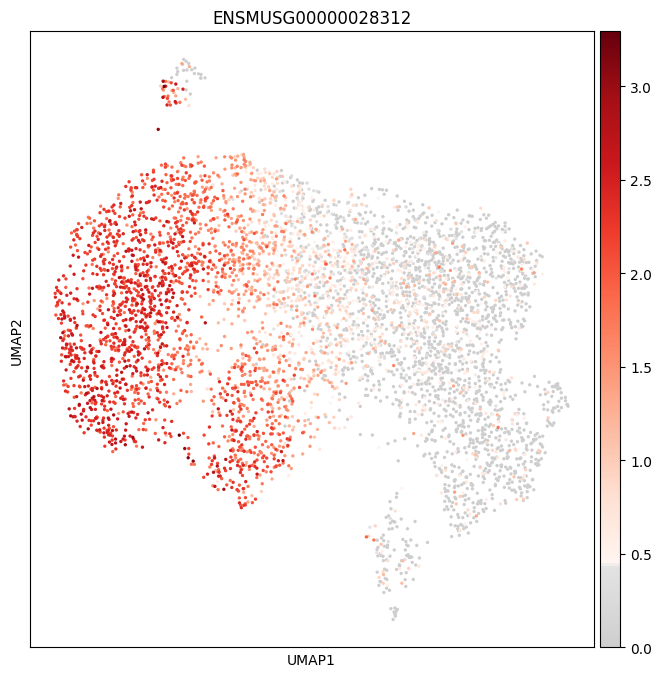

In [15]:
gene_symbols = ['Top2a', 'Cdk1', 'Smc2']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/7_star-like_Cluster2_' + gene_symbol + '.pdf')


## Cluster 3

Encrypted symbol for  Ero1a is  ENSMUSG00000021831


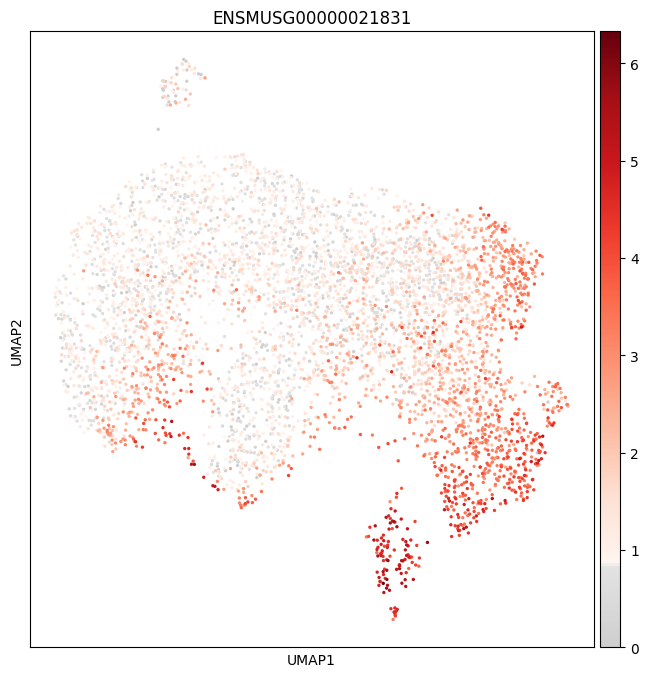

Encrypted symbol for  Ndrg1 is  ENSMUSG00000005125


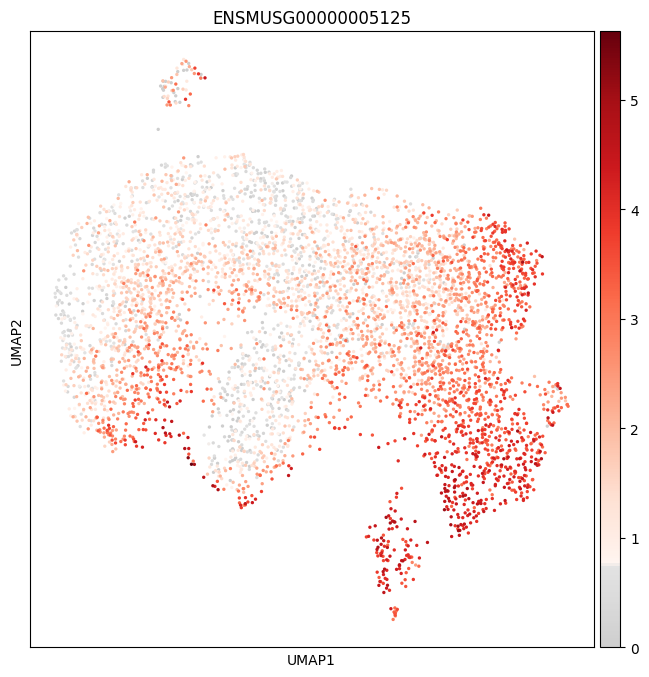

Encrypted symbol for  Eprs is  ENSMUSG00000026615


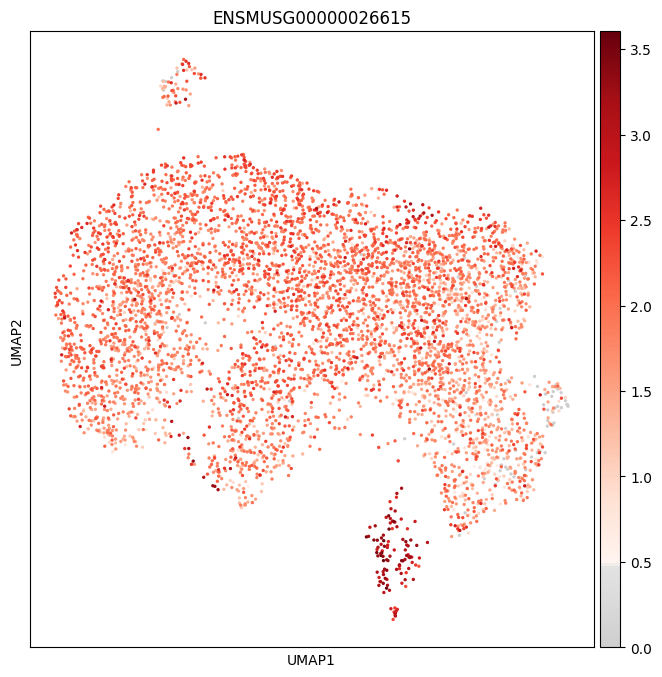

Encrypted symbol for  Hspa9 is  ENSMUSG00000024359


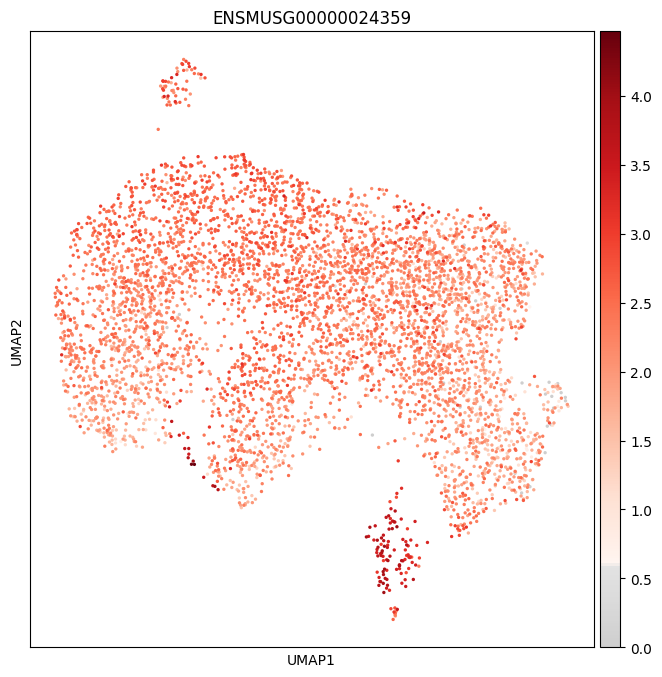

In [17]:
gene_symbols = ['Ero1a', 'Ndrg1', 'Eprs', 'Hspa9']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/7_star-like_Cluster3_' + gene_symbol + '.pdf')
